#============================================================================================================================================
# **Física Teórica 3 (Mecánica Estadística): Teórica 9 - Extras**
#============================================================================================================================================

# Partícula cargada en un campo magnético uniforme
En este notebook usamos SymPy para calcular las ecuaciones clásicas de movimiento de una partícula cargada (con carga -e) en un campo magnético uniforme B, usando manipulación algebraica. Luego usamos NumPy y SciPy para integrar numéricamente esas ecuaciones. Comenzamos con código para que Sympy funcione automáticamente en Google colab, o en notebooks Jupyter si alguno de ustedes tiene Python y Jupyter instalado y decide ejecutarlo en sus computadoras. Recuerden ejecutar cada celda aprentando SHIFT+ENTER:

In [ ]:
# Codigo para que Sympy funcione correctamente en Google colab o en sus computadoras
import os
if "COLAB_GPU" in os.environ:
  from sympy import *
  def custom_latex_printer(expr, **options):
      from IPython.display import Math, HTML
      from google.colab.output._publish import javascript
      url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-AMS_CHTML"
      javascript(content="""window.MathJax = { tex2jax: { inlineMath: [ ['$','$'] ], processEscapes: true } };""")
      javascript(url=url)
      return latex(expr, **options)
  init_printing(use_latex="mathjax", latex_printer=custom_latex_printer)
else:
  from sympy import *
  init_printing()

Definimos los símbolos reales que vamos a usar con SymPy:

In [ ]:
x,y       = symbols("x y",real=True)
p_x,p_y   = symbols("p_x p_y",real=True)
v_x,v_y   = symbols("v_x v_y",real=True)
m,e,B,c,H = symbols("m e B c H",real=True)

Escribimos el Hamiltoniano de una partícula con carga -e en un campo magnético uniforme. Elegimos un gauge particular para el potencial vector, tal que el campo uniforme B apunte en la dirección z:

In [ ]:
A_x = -B*y/2
A_y =  B*x/2
H  = ((p_x + e*A_x/c)**2 + (p_y + e*A_y/c)**2)/(2*m)
H

<IPython.core.display.Javascript object>

             2                 2
⎛B⋅e⋅x      ⎞    ⎛  B⋅e⋅y     ⎞ 
⎜───── + p_y⎟  + ⎜- ───── + pₓ⎟ 
⎝ 2⋅c       ⎠    ⎝   2⋅c      ⎠ 
────────────────────────────────
              2⋅m               

Calculamos las ecuaciones de movimiento a partir del Hamiltoniano:

In [ ]:
# dp_x/dt = - dH/dx
dpx = expand(-diff(H,x))
dpx

<IPython.core.display.Javascript object>

   2  2            
  B ⋅e ⋅x   B⋅e⋅p_y
- ─────── - ───────
      2      2⋅c⋅m 
   4⋅c ⋅m          

In [ ]:
# dp_y/dt = - dH/dy
dpy = expand(-diff(H,y))
dpy

<IPython.core.display.Javascript object>

   2  2           
  B ⋅e ⋅y   B⋅e⋅pₓ
- ─────── + ──────
      2     2⋅c⋅m 
   4⋅c ⋅m         

In [ ]:
# dx/dt = dH/dp_x
dx = expand(diff(H,p_x))
dx

<IPython.core.display.Javascript object>

  B⋅e⋅y   pₓ
- ───── + ──
  2⋅c⋅m   m 

In [ ]:
# dy/dt = dH/dp_y
dy = expand(diff(H,p_y))
dy

<IPython.core.display.Javascript object>

B⋅e⋅x   p_y
───── + ───
2⋅c⋅m    m 

Ahora calculamos las ecuaciones para la derivada segunda en el tiempo de x y de y (o para la derivada primera de v_x y v_y, es decir, dv_x/dt y dv_y/dt). Recordar que el impulso generalizado (para una carga -e) es P = mv - eA/c. Para calcular la derivada segunda de x en el tiempo, nos alcanza con reemplazar y por dy/dt, y p_x por dp_x/dt. Además, debemos reemplazar p_y por su definición en términos de v_y y A_y. Luego hacemos lo mismo para y. Notar que las dos ecuaciones juntas son equivalentes a las de un oscilador armónico con frecuencia omega = eB/(mc):

In [ ]:
# d^2 x/dt^2 = dv_x/dt =
expand(dx.subs(y,dy).subs(p_x,dpx).subs(p_y,m*v_y - e*A_y/c))

<IPython.core.display.Javascript object>

-B⋅e⋅v_y 
─────────
   c⋅m   

In [ ]:
# d^2 y/dt/2 = dv_y/dt =
expand(dy.subs(x,dx).subs(p_y,dpy).subs(p_x,m*v_x - e*A_x/c))

<IPython.core.display.Javascript object>

B⋅e⋅vₓ
──────
 c⋅m  

Ahora usamos NumPy y SciPy para integrar estas ecuaciones en forma numérica, y ver las trayectorias que puede hacer la partícula. Comenzamos importando NumPy, SciPy y Matplotlib, definimos la frecuencia, y definimos las ecuaciones diferenciales que queremos integrar. Los integradores numéricos (como la rutina "odeint" de SciPy, https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) usualmente requieren ecuaciones diferenciales ordinarias (ODEs) de primer orden:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.rcParams.update({'font.size': 14})

# Frecuencia omega = eB/(mc)
omega = 1

def f(z, t):               # Definimos las ecuaciones diferenciales que queremos integrar
	x, y, vx, vy = z
	dx  =  vx
	dy  =  vy
	dvx = -omega * vy
	dvy =  omega * vx
	return dx, dy, dvx, dvy
def solve(x):              # Definimos una función que obtiene la solución integrando numéricamente sobre un vector de tiempo t
	f2 = lambda z,t: f(z, t)
	r  = odeint(f2,x0,x)
	return r

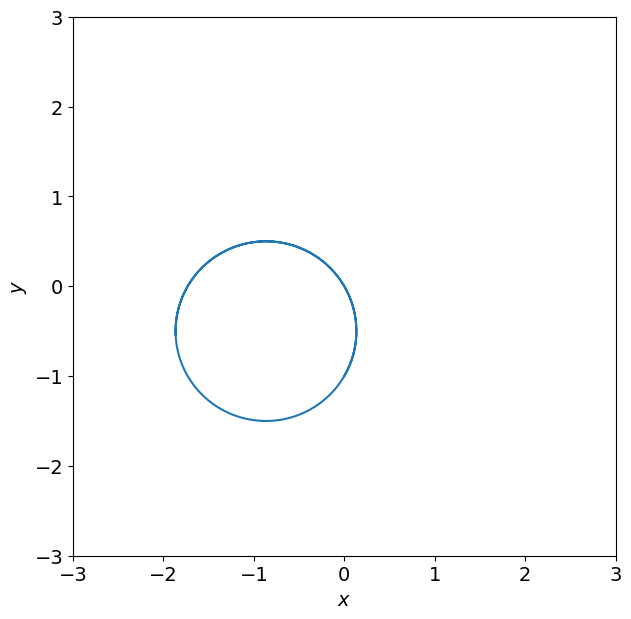

In [ ]:
# Construimos un vector con el tiempo, desde t=0 hasta 10
time = np.arange(1000)/100

# Generamos condiciones iniciales
x    = 0
y    = -1
vx   = .5              # Debe ser <=1 salvo que se modifique la siguiente linea
vy   = np.sqrt(1-vx**2) # Tomamos vx^2 + vy^2 = 1 en t = 0
x0   = x, y, vx, vy

# Resolvemos las ecuaciones diferenciales
sol = solve(time)

# Graficamos la trayectoria en el plano x,y. Las columas 0 y 1 de "sol" tienen x(t) e y(t)
plt.figure(figsize=(7,7))
plt.plot(sol[:,0],sol[:,1])
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

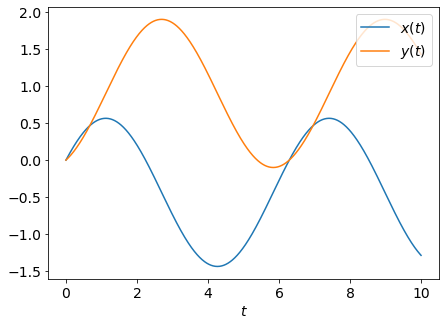

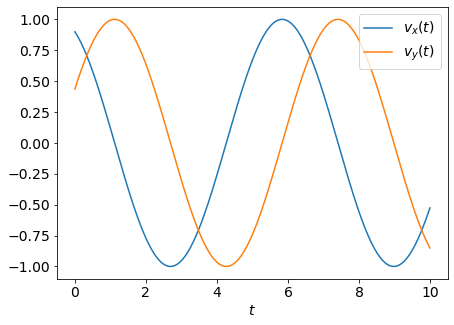

In [ ]:
plt.figure(figsize=(7,5))               # Graficamos x(t) e y(t)
plt.plot(time,sol[:,0],label=r'$x(t)$')
plt.plot(time,sol[:,1],label=r'$y(t)$')
plt.legend(loc="upper right")
plt.xlabel(r'$t$')
plt.show()

plt.figure(figsize=(7,5))                 # Graficamos v_x(t) y v_y(t)
plt.plot(time,sol[:,2],label=r'$v_x(t)$')
plt.plot(time,sol[:,3],label=r'$v_y(t)$')
plt.legend(loc="upper right")
plt.xlabel(r'$t$')
plt.show()

#———————————————————————————————————————————————————————————————————————————————————————————————

#———————————————————————————————————————————————————————————————————————————————————————————————